In [46]:
# Import PyTorch
import torch
from torch import nn

import pandas as pd
# Import torchvision 
import torchvision
from torchvision import datasets 
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt


from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms


In [47]:
train_data_csv_file_path = "consolidated_disaster_types_train_final.tsv"
test_data_csv_file_path = "consolidated_disaster_types_test_final.tsv"

train_data = pd.read_csv(train_data_csv_file_path,sep="\t")
test_data = pd.read_csv(test_data_csv_file_path,sep="\t")

train_data['class_label'].unique()

array(['hurricane', 'not_disaster', 'fire', 'flood', 'earthquake',
       'other_disaster', 'landslide'], dtype=object)

In [48]:
class DisasterDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.data_frame = pd.read_csv(csv_file,sep="\t")
        self.data_frame = self.data_frame.dropna(subset=['class_label'])

        # Define label mapping
        self.label_mapping = {
            'hurricane': 0,
            'not_disaster': 1,
            'fire': 2,
            'flood': 3,
            'earthquake': 4,
            'other_disaster': 5,
            'landslide': 6
        }
        # Create a reverse label mapping (for easy retrieval of class names)
        self.reverse_label_mapping = {v: k for k, v in self.label_mapping.items()}

        self.transform = transform

    def __len__(self):
        return len(self.data_frame)

    def __getitem__(self, idx):
        img_path = self.data_frame.iloc[idx]['image_path']
        class_label = self.data_frame.iloc[idx]['class_label']
        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)

        label = torch.tensor(self.label_mapping[class_label], dtype=torch.long)
        return image, label

    # New method to return class names
    def get_class_names(self):
        return [self.reverse_label_mapping[i] for i in range(len(self.reverse_label_mapping))]


In [22]:
# Define the transformations for the images
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Resize images to 28x28 pixels
    transforms.Grayscale(num_output_channels=1),  # Convert images to grayscale (1 channel)
    transforms.ToTensor(),  # Convert images to PyTorch tensors
])


In [49]:
# Define the transformations for the images
# transform_3 = transforms.Compose([
#     transforms.Resize((200, 200)),  # Resize images to 28x28 pixels
#     transforms.Grayscale(num_output_channels=1),  # Convert images to grayscale (1 channel)
#     transforms.ToTensor(),  # Convert images to PyTorch tensors
# ])


transform_3 = transforms.Compose([
    transforms.Resize((200, 200)),  # Resize images to 200x200 pixels
    transforms.Grayscale(num_output_channels=1),  # Convert images to grayscale
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.RandomRotation(10),  # Randomly rotate images by up to 10 degrees
    transforms.RandomAffine(degrees=0,translate=(0.1, 0.1)),  # Randomly shift images by 10%
    transforms.ToTensor()  # Convert images to PyTorch tensors
])



In [24]:


## CREATING DATASET
train_dataset = DisasterDataset(csv_file=train_data_csv_file_path, transform=transform)
# Create a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)


## CREATING DATASET
test_dataset = DisasterDataset(csv_file=test_data_csv_file_path, transform=transform)
# Create a DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [50]:


## CREATING DATASET
train_dataset = DisasterDataset(csv_file=train_data_csv_file_path, transform=transform_3)
# Create a DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)


## CREATING DATASET
test_dataset = DisasterDataset(csv_file=test_data_csv_file_path, transform=transform_3)
# Create a DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [51]:
# Test the DataLoader
for images, labels in train_dataloader:
    print(f'Image shape: {images.shape}')  # Should be torch.Size([32, 1, 28, 28]) for a batch of 32
    print(f'Labels: {labels}')  # Should contain labels 0 to 6 as per the mapping
    break  # Stop after the first batch for testing


Image shape: torch.Size([32, 1, 200, 200])
Labels: tensor([1, 2, 3, 0, 3, 6, 3, 1, 6, 3, 4, 3, 0, 3, 1, 3, 0, 6, 1, 4, 4, 4, 3, 2,
        3, 5, 4, 6, 0, 1, 0, 2])


In [52]:


# Print class names for train dataset
print("Train Dataset Class Names:", train_dataset.get_class_names())
train_class_names = train_dataset.get_class_names()


# Print class names for test dataset
print("Test Dataset Class Names:", test_dataset.get_class_names())


Train Dataset Class Names: ['hurricane', 'not_disaster', 'fire', 'flood', 'earthquake', 'other_disaster', 'landslide']
Test Dataset Class Names: ['hurricane', 'not_disaster', 'fire', 'flood', 'earthquake', 'other_disaster', 'landslide']


Image shape: torch.Size([1, 200, 200])


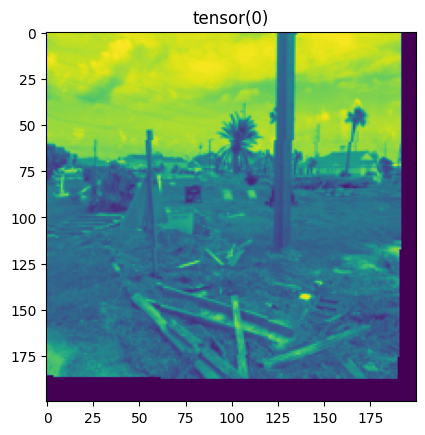

In [53]:
import matplotlib.pyplot as plt
image, label = train_dataset[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

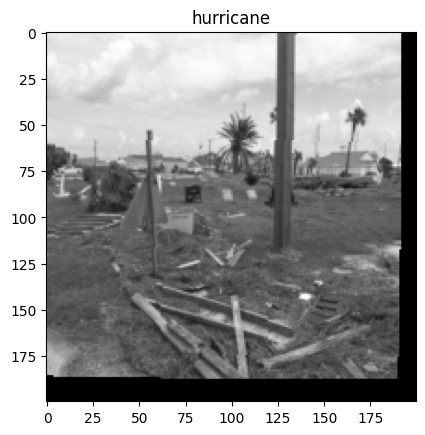

In [54]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(train_class_names[label]);

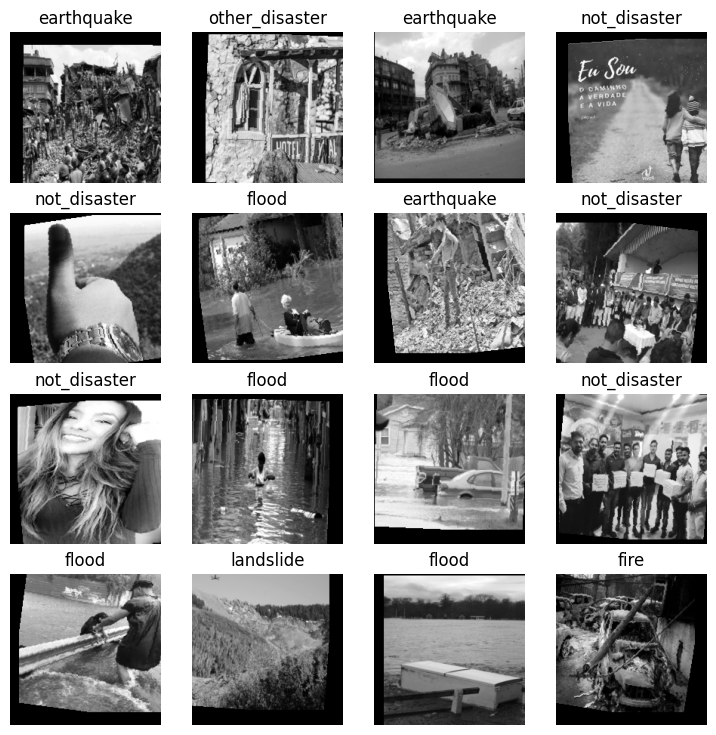

In [55]:
torch.manual_seed(9)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_dataset[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_class_names[label])
    plt.axis(False);

In [56]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 200, 200]), torch.Size([32]))

Image size: torch.Size([1, 200, 200])
Label: 0, label size: torch.Size([])


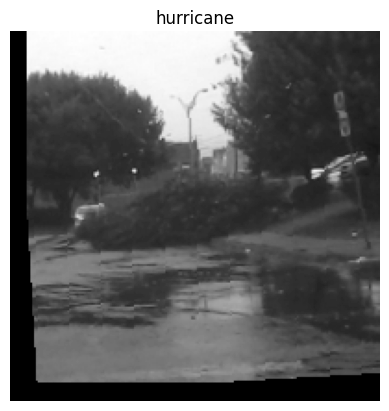

In [32]:
torch.manual_seed(9)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(train_class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [33]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
print(x)
print(output)

Shape before flattening: torch.Size([1, 200, 200]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 40000]) -> [color_channels, height*width]
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.]])


In [34]:
from torch import nn
class DisasterClassificationModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [35]:
torch.manual_seed(9)

# Need to setup model with input parameters
model_0 = DisasterClassificationModelV0(input_shape=40000, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(train_class_names) # one for every class
)
model_0.to("cpu") # keep model on CPU to begin with 

DisasterClassificationModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=40000, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=7, bias=True)
  )
)

In [36]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [37]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [38]:
from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [39]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(9)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs =30

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train() 
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)
           
            # 2. Calculate loss (accumulatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/12846 samples
Looked at 12800/12846 samples

Train loss: nan | Test loss: nan, Test acc: 11.01%

Epoch: 1
-------
Looked at 0/12846 samples
Looked at 12800/12846 samples

Train loss: nan | Test loss: nan, Test acc: 11.03%

Epoch: 2
-------
Looked at 0/12846 samples
Looked at 12800/12846 samples

Train loss: nan | Test loss: nan, Test acc: 11.03%

Epoch: 3
-------
Looked at 0/12846 samples


KeyboardInterrupt: 

In [ ]:
torch.manual_seed(9)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)
            
            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)
        
        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
        
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

In [40]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Create a model with non-linear and linear layers
class DisasterClassificationModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(9)
model_1 = DisasterClassificationModelV1(input_shape=40000, # number of input features
    hidden_units=10,
    output_shape=len(train_class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

In [41]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

NameError: name 'model_1' is not defined

In [42]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(9)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

In [ ]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

In [ ]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

In [ ]:
torch.manual_seed(42)

torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=len(train_class_names),
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
# conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 
# Create a new conv_layer with different values (try setting these to whatever you like)





conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=len(train_class_names),
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

print(conv_layer_2)
# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
print(conv_layer_2(test_image.unsqueeze(dim=0)).shape)

# Check out the conv_layer_2 internal parameters
print("shape",conv_layer_2.state_dict()['weight'].shape)


# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")


# Print out original image shape without and with unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}")

# Create a sample nn.MaxPoo2d() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")


torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

In [ ]:
# Create a convolutional neural network 
class DisasterClassificationModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*2500, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = DisasterClassificationModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(train_class_names)).to(device)
model_2

In [ ]:

import torch.nn.functional as F

class DisasterClassificationModelV3(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super(DisasterClassificationModelV3, self).__init__()
        
        # Block 1: Conv2D(32, (3, 3)) + MaxPooling2D((2, 2))
        self.conv1 = nn.Conv2d(in_channels=input_shape, out_channels=32, kernel_size=3, padding=1)  # 1 channel input (grayscale)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Block 2: Conv2d(64, (3, 3)) + MaxPooling2D((2, 2))
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Block 3: Conv2D(128, (3, 3)) + MaxPooling2D((2, 2))
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Block 4: Conv2D(128, (3, 3)) + MaxPooling2D((2, 2))
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Flatten layer
        self.flatten = nn.Flatten()
        
        # Fully connected layers (Dense layers in Keras)
        # After pooling, input size will be reduced from 200x200 to 12x12
        self.fc1 = nn.Linear(in_features=128 * 12 * 12, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=output_shape)  # 7 output classes (0 to 6)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # no softmax here as we typically use CrossEntropyLoss which applies it internally
        
        return x


torch.manual_seed(9)
model_3 = DisasterClassificationModelV3(input_shape=1, 
    hidden_units=10, 
    output_shape=len(train_class_names)).to(device)
model_3

In [57]:
import torch.nn.functional as F

class DisasterClassificationModelV3(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super(DisasterClassificationModelV3, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=input_shape, out_channels=32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.flatten = nn.Flatten()
        self.dropout = nn.Dropout(p=0.5)  # Dropout with probability 0.5
        self.fc1 = nn.Linear(in_features=128 * 12 * 12, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=output_shape)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        
        x = self.flatten(x)
        x = self.dropout(F.relu(self.fc1(x)))  # Apply dropout before the fully connected layer
        x = self.fc2(x)
        
        return x



torch.manual_seed(9)
model_3 = DisasterClassificationModelV3(input_shape=1, 
    hidden_units=10, 
    output_shape=len(train_class_names)).to(device)
model_3

DisasterClassificationModelV3(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=18432, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=7, bias=True)
)

In [ ]:
import torch.nn.functional as F

class DisasterClassificationModelV4(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super(DisasterClassificationModelV4, self).__init__()
        
        # Block 1: Conv2D(32, (3, 3)) + MaxPooling2D((2, 2))
        self.conv1 = nn.Conv2d(in_channels=input_shape, out_channels=32, kernel_size=3, padding=1)  # Grayscale image
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Block 2: Conv2d(64, (3, 3)) + MaxPooling2D((2, 2))
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Block 3: Conv2D(128, (3, 3)) + MaxPooling2D((2, 2))
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Block 4: Conv2D(128, (3, 3)) + MaxPooling2D((2, 2))
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Flatten layer
        self.flatten = nn.Flatten()
        
        # Fully connected layers (Dense layers in Keras)
        # After pooling, input size will be reduced from 150x150 to 9x9
        self.fc1 = nn.Linear(in_features=128 * 9 * 9, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=output_shape)  # 7 output classes (0 to 6)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)  # No softmax because we'll use CrossEntropyLoss
        
        return x


torch.manual_seed(9)
model_4 = DisasterClassificationModelV4(input_shape=1, 
    hidden_units=10, 
    output_shape=len(train_class_names)).to(device)
model_4

In [ ]:
test_image.unsqueeze(dim=0).shape

In [ ]:
print(test_image.shape)
conv_layer(test_image.unsqueeze(dim=0)).shape

In [ ]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

In [58]:
from torch.optim.lr_scheduler import StepLR


# Setup loss and optimizer

loss_fn_3 = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model_2.parameters(), 
#                              lr=0.1)

# Define the RMSprop optimizer
optimizer_3 = torch.optim.RMSprop(params=model_3.parameters(), 
                          lr=0.001,  # learning rate
                          alpha=0.9,  # smoothing constant (decay factor)
                          eps=1e-08,  # term added to the denominator to improve numerical stability
                          weight_decay=0,  # L2 penalty (regularization term), 0 by default
                          momentum=0.0,  # momentum factor
                          centered=False)  # if True, compute the centered RMSProp, which includes the gradient's variance

scheduler = StepLR(optimizer_3, step_size=5, gamma=0.1)  # Decays the learning rate by 0.1 every 5 epochs

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params=model_2.parameters(), 
#                              lr=0.1)

# Define the RMSprop optimizer
optimizer = torch.optim.RMSprop(params=model_4.parameters(), 
                          lr=0.001,  # learning rate
                          alpha=0.9,  # smoothing constant (decay factor)
                          eps=1e-08,  # term added to the denominator to improve numerical stability
                          weight_decay=0,  # L2 penalty (regularization term), 0 by default
                          momentum=0.0,  # momentum factor
                          centered=False)  # if True, compute the centered RMSProp, which includes the gradient's variance

In [ ]:
torch.manual_seed(9)

# Measure time
from timeit import default_timer as timer
train_time_start_model_3 = timer()

# Train and test model 
epochs = 50
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_3, 
        loss_fn=loss_fn_3,
        optimizer=optimizer_3,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_3,
        loss_fn=loss_fn_3,
        accuracy_fn=accuracy_fn,
        device=device
    )

    scheduler.step()

train_time_end_model_3 = timer()
total_train_time_model_3 = print_train_time(start=train_time_start_model_3,
                                           end=train_time_end_model_3,
                                           device=device)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.78988 | Train accuracy: 31.49%
Test loss: 1.75681 | Test accuracy: 36.96%

Epoch: 1
---------
Train loss: 1.60920 | Train accuracy: 39.71%
Test loss: 1.54771 | Test accuracy: 42.81%

Epoch: 2
---------
Train loss: 1.52308 | Train accuracy: 43.53%
Test loss: 1.51351 | Test accuracy: 44.58%

Epoch: 3
---------
Train loss: 1.47306 | Train accuracy: 45.66%
Test loss: 1.45313 | Test accuracy: 46.04%

Epoch: 4
---------
Train loss: 1.42630 | Train accuracy: 48.25%
Test loss: 1.46512 | Test accuracy: 44.97%

Epoch: 5
---------
Train loss: 1.30908 | Train accuracy: 52.64%


In [ ]:
torch.manual_seed(9)

# Measure time
from timeit import default_timer as timer
train_time_start_model_4 = timer()

# Train and test model 
epochs = 30
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_4, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_4,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_4 = timer()
total_train_time_model_4 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

In [ ]:
# Get model_2 results 
model_4_results = eval_model(
    model=model_4,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_4_results